In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors, linear_model, model_selection,metrics

In [23]:
df = pd.read_csv('preprocessed_data_craigslist.csv').drop(['Unnamed: 0','text','URL','modelname/number'],axis=1).drop_duplicates(subset=None, keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 219
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 167 non-null    float64
 1   Neighborhood          167 non-null    object 
 2   bicycleframematerial  167 non-null    object 
 3   bicycletype           167 non-null    object 
 4   framesize             167 non-null    object 
 5   suspension            167 non-null    float64
 6   wheelsize             152 non-null    object 
 7   numimage              167 non-null    float64
 8   condition             167 non-null    object 
 9   electricassist        167 non-null    float64
 10  make/manufacturer     167 non-null    object 
 11  braketype             167 non-null    object 
 12  handlebartype         167 non-null    object 
dtypes: float64(4), object(9)
memory usage: 18.3+ KB


In [24]:
df

,Price,Neighborhood,bicycleframematerial,bicycletype,framesize,suspension,wheelsize,numimage,condition,electricassist,make/manufacturer,braketype,handlebartype
0,1900.0,"hudson, fl",other/unknown,other/unknown,other/unknown,0.0,other/unknown,0.0,other/unknown,0.0,other/unknown,other/unknown,other/unknown
1,300.0,fairfield ct,other/unknown,other/unknown,other/unknown,0.0,other/unknown,0.0,other/unknown,0.0,other/unknown,other/unknown,other/unknown
2,190.0,brooklyn,other/unknown,other/unknown,other/unknown,0.0,other/unknown,0.0,other/unknown,0.0,other/unknown,other/unknown,other/unknown
3,250.0,west village,other/unknown,other/unknown,other/unknown,0.0,other/unknown,0.0,other/unknown,0.0,other/unknown,other/unknown,other/unknown
4,800.0,brooklyn,other/unknown,other/unknown,other/unknown,0.0,other/unknown,0.0,other/unknown,0.0,other/unknown,other/unknown,other/unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,300.0,manhattan,composite,hybrid/comfort,medium,0.0,29,11.0,excellent,0.0,greenstar bikes,other/unknown,other/unknown
216,275.0,11231,other/unknown,hybrid/comfort,other/unknown,0.0,other/unknown,10.0,excellent,0.0,other/unknown,other/unknown,other/unknown
217,999.0,financial district,aluminum,bmx,other/unknown,0.0,29,7.0,excellent,0.0,other/unknown,other/unknown,other/unknown
218,3850.0,brooklyn,steel,gravel,other/unknown,0.0,27,0.0,other/unknown,0.0,other/unknown,other/unknown,other/unknown


In [25]:
pd.get_dummies(df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 219
Columns: 126 entries, Price to handlebartype_riser
dtypes: float64(4), uint8(122)
memory usage: 26.4 KB


In [26]:
linear_regression = linear_model.LinearRegression()

X = pd.get_dummies(df.drop(columns=['Price']))
display(X)
y = df.Price

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

,suspension,numimage,electricassist,Neighborhood_11231,Neighborhood_battery park,Neighborhood_bensonhurst,Neighborhood_bensonhurst brooklyn,Neighborhood_best value nationwide!,Neighborhood_bridgeport,Neighborhood_bronx,...,braketype_disc (mechanical),braketype_gyro/bmx,braketype_other/unknown,braketype_u-brakes,braketype_v-brakes,handlebartype_bmx,handlebartype_drop,handlebartype_flat,handlebartype_other/unknown,handlebartype_riser
0,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.0,11.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
216,0.0,10.0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
217,0.0,7.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
218,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [27]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [28]:
linear_regression.intercept_

75769501804709.0

In [29]:
linear_regression.coef_

array([-9.10168798e+13, -4.13286633e+01,  4.17635505e+13, -2.44835927e+12,
       -1.00455355e+12, -2.44835927e+12, -2.44835927e+12, -2.44835927e+12,
       -2.44835927e+12, -2.44835927e+12, -2.44835927e+12, -2.44835927e+12,
       -2.44835927e+12, -2.44835927e+12, -2.44835927e+12,  2.94985571e+13,
       -1.11831295e+12, -2.44835927e+12, -2.44835927e+12, -5.26912530e+11,
       -2.44835927e+12, -2.44835927e+12, -2.44835927e+12, -2.44835927e+12,
       -2.44835927e+12, -2.44835927e+12, -2.44835927e+12, -2.44835927e+12,
       -2.44835927e+12, -2.44835927e+12, -2.44835927e+12, -2.44835927e+12,
       -2.44835927e+12, -2.44835927e+12,  2.48536918e+13, -7.23178148e+12,
        3.82725721e+13, -2.44835927e+12, -2.64044270e+11, -2.44835927e+12,
       -2.44835927e+12, -2.44835927e+12, -2.44835927e+12, -2.44835927e+12,
       -2.44835927e+12, -2.44835927e+12, -2.44835927e+12, -2.44835927e+12,
       -2.44835927e+12, -2.44835927e+12, -2.44835927e+12, -2.44835927e+12,
       -2.44835927e+12, -

In [30]:
y_pred = linear_regression.predict(X_test)
print('Coefficients: \n', linear_regression.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((linear_regression.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' %linear_regression.score(X_test,y_test))

Coefficients: 
 [-9.10168798e+13 -4.13286633e+01  4.17635505e+13 -2.44835927e+12
 -1.00455355e+12 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12
 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12
 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12  2.94985571e+13
 -1.11831295e+12 -2.44835927e+12 -2.44835927e+12 -5.26912530e+11
 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12
 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12
 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12
 -2.44835927e+12 -2.44835927e+12  2.48536918e+13 -7.23178148e+12
  3.82725721e+13 -2.44835927e+12 -2.64044270e+11 -2.44835927e+12
 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12
 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12
 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12
 -2.44835927e+12 -2.44835927e+12 -2.44835927e+12 -3.06103756e+13
  1.11897692e+13 -1.74525797e+11  1.55227849e+10  1.11897692e+13
  1.11897

In [31]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
189,40.0,1.203976e+13
19,180.0,3.194692e+13
158,160.0,6.743014e+13
54,1200.0,2.184315e+12
18,50.0,1.174688e+02
4,800.0,8.714844e+02
65,10.0,1.330046e+12
188,60.0,-2.002656e+02
75,35.0,2.130312e+02
211,1750.0,-4.857787e+13


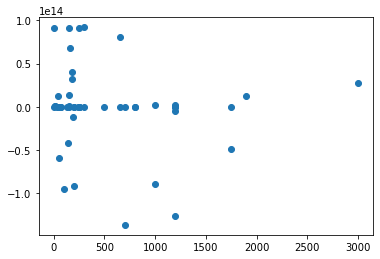

In [32]:
from matplotlib import pyplot as plt

plt.scatter(df_pred['Actual'],df_pred['Predicted'])